In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [14]:
# to avoid encoding error, use unicode_escape
df = pd.read_csv("Diwali Sales Data.csv",encoding="unicode_escape")

In [16]:
df.shape

(11251, 15)

In [17]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [21]:
# drop blank columns
df.drop(columns=["Status","unnamed1"],inplace=True)

In [23]:
# checking null values
df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [25]:
#drop null values
df.dropna(inplace=True)

In [27]:
df["Amount"] = df["Amount"].astype("int")

In [29]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


 # Exploratry Data Analysis

## Gender

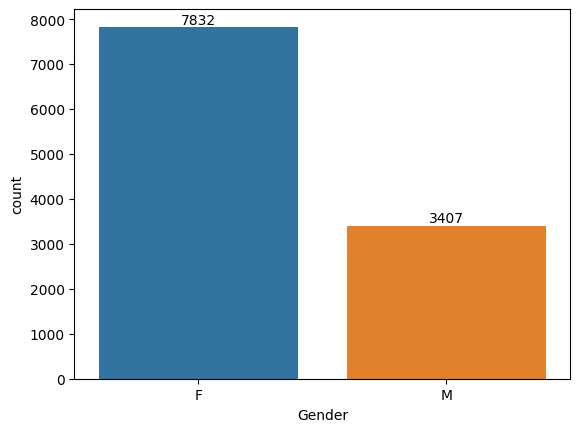

In [51]:
ax = sns.countplot(x="Gender",data=df,hue="Gender")
for bars in ax.containers:
    ax.bar_label(bars)

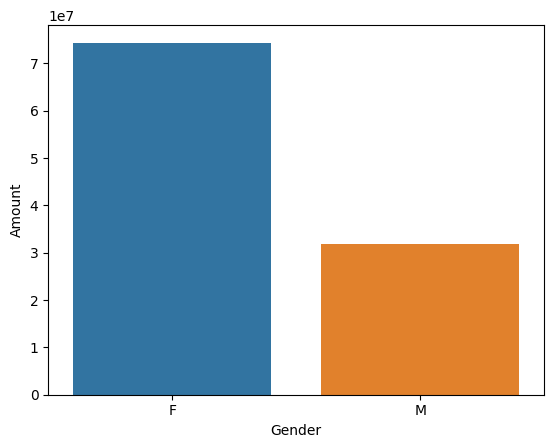

In [50]:
sales_gen=df.groupby(["Gender"],as_index=False)["Amount"].sum().sort_values(by="Amount",ascending=False)
sns.barplot(x="Gender",y="Amount",data=sales_gen,hue="Gender");

From above we can see that most buyers are females and purchasing power of females are greater than males

## Age

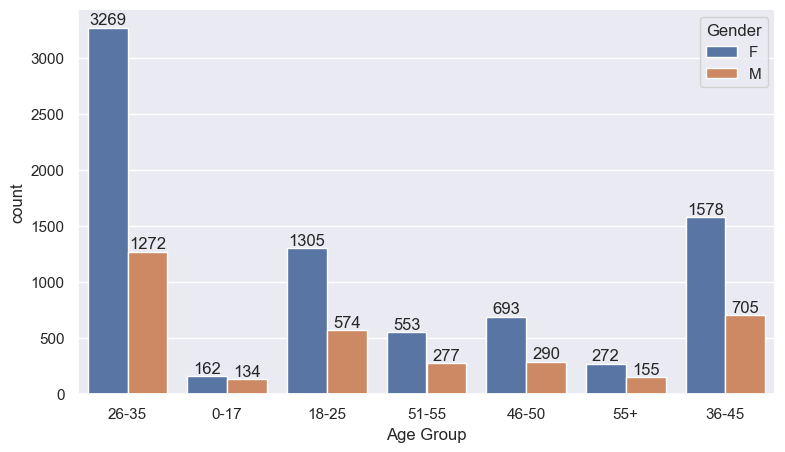

In [105]:
ax= sns.countplot(data=df, x="Age Group",hue="Gender")
sns.set(rc={"figure.figsize":(9,5)})
for bars in ax.containers:
    ax.bar_label(bars)

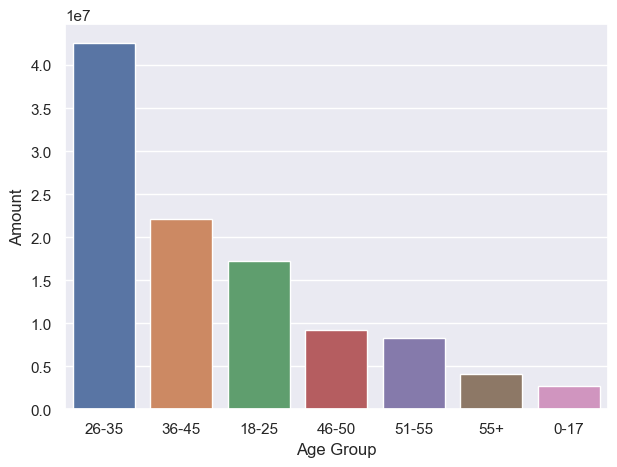

In [104]:
# Total Amount vs Age Group
sales_age = df.groupby(["Age Group"],as_index=False)["Amount"].sum().sort_values(by="Amount",ascending=False)
sns.barplot(data=sales_age,x="Age Group",y="Amount",hue="Age Group")
sns.set(rc={"figure.figsize":(9,5)});

From above graph we can see that most buyers are age group between 26-35 yrs female.

## State

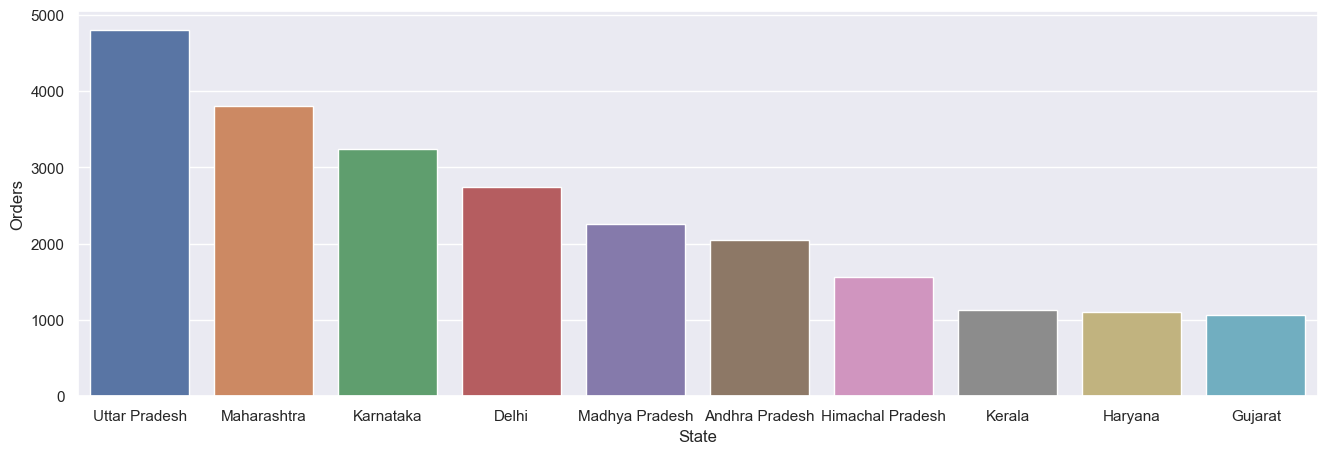

In [93]:
sales_state= df.groupby(["State"],as_index=False)["Orders"].sum().sort_values(by="Orders",ascending=False).head(10)
sns.set(rc={"figure.figsize":(16,5)})
sns.barplot(data=sales_state,x="State",y="Orders",hue="State");

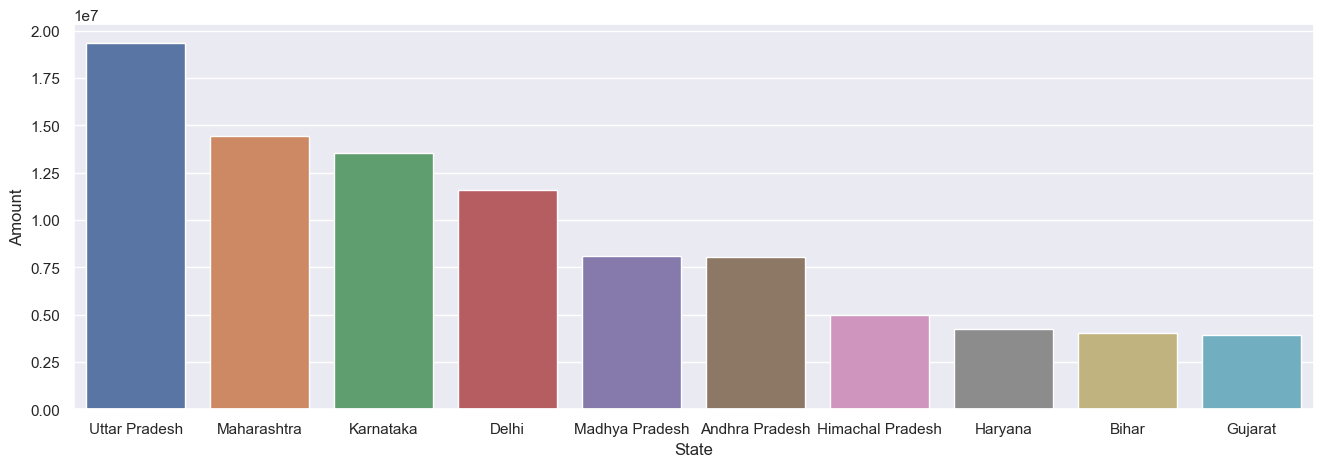

In [94]:
sales_state= df.groupby(["State"],as_index=False)["Amount"].sum().sort_values(by="Amount",ascending=False).head(10)
sns.set(rc={"figure.figsize":(16,5)})
sns.barplot(data=sales_state,x="State",y="Amount",hue="State");

From above graphs we can see that most of the orders and total sales/amount are from Uttar Pradesh, Maharashtra and Karnataka respectively

## Marital Status

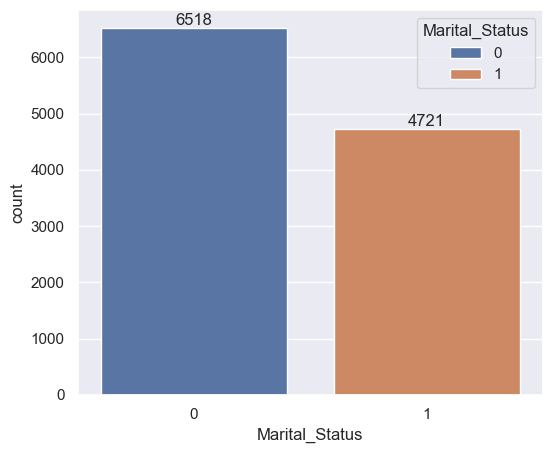

In [115]:
ax= sns.countplot(data=df,x="Marital_Status",hue="Marital_Status")
sns.set(rc={"figure.figsize":(6,5)})
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

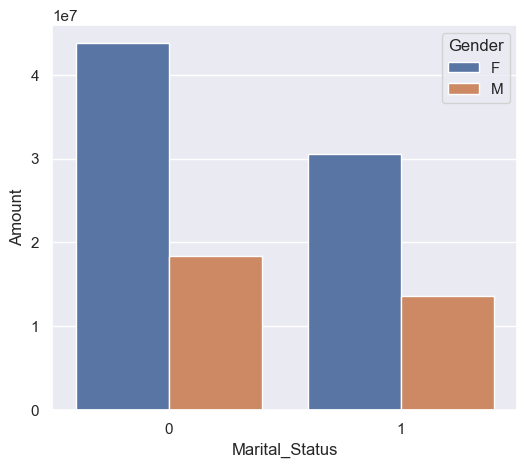

In [113]:
sales_marital = df.groupby(["Marital_Status","Gender"],as_index=False)["Amount"].sum().sort_values(by="Amount",ascending=False)
sns.set(rc={"figure.figsize":(6,5)})
sns.barplot(data=sales_marital,x="Marital_Status",y="Amount",hue="Gender")

From above graphs we can see that most buyers are married(women and have high purchasing power.

## Occupation

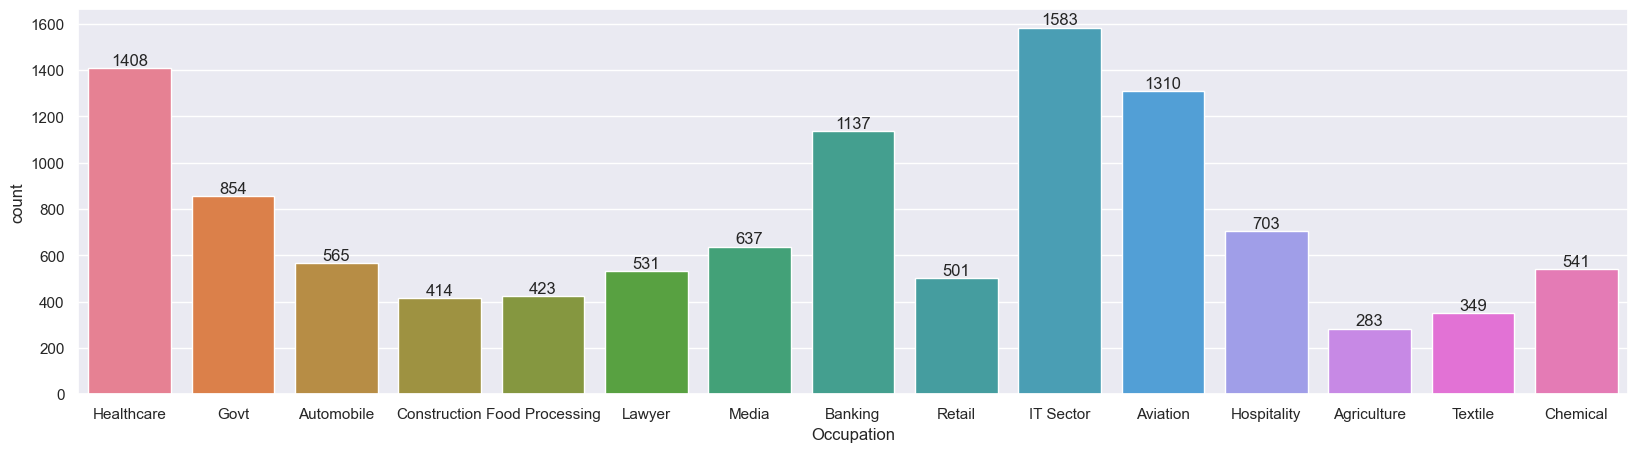

In [120]:
ax= sns.countplot(data=df,x="Occupation",hue="Occupation")
sns.set(rc={"figure.figsize":(20,5)})
for bars in ax.containers:
    ax.bar_label(bars)

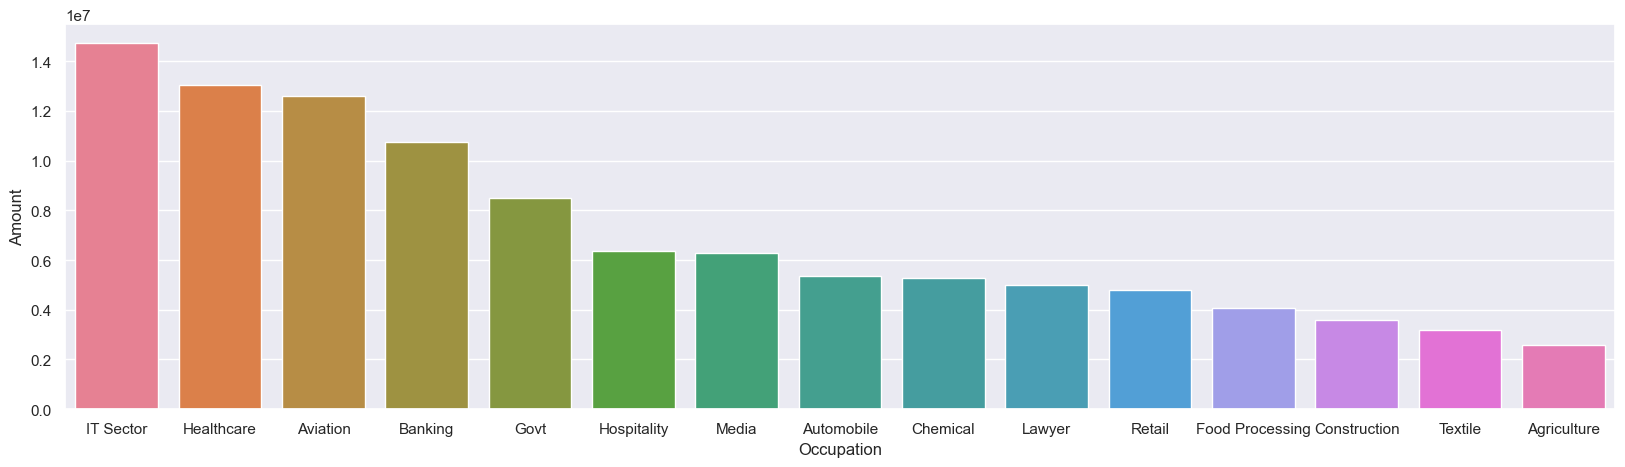

In [123]:
sales_occup= df.groupby(["Occupation"],as_index=False)["Amount"].sum().sort_values(by="Amount",ascending=False)
sns.set(rc={"figure.figsize":(20,5)})
sns.barplot(data=sales_occup,x="Occupation",y="Amount",hue="Occupation");

*From above graph we can see that most buyers are working in IT Sector, Healthcare and Aviation*

## Product Categroy

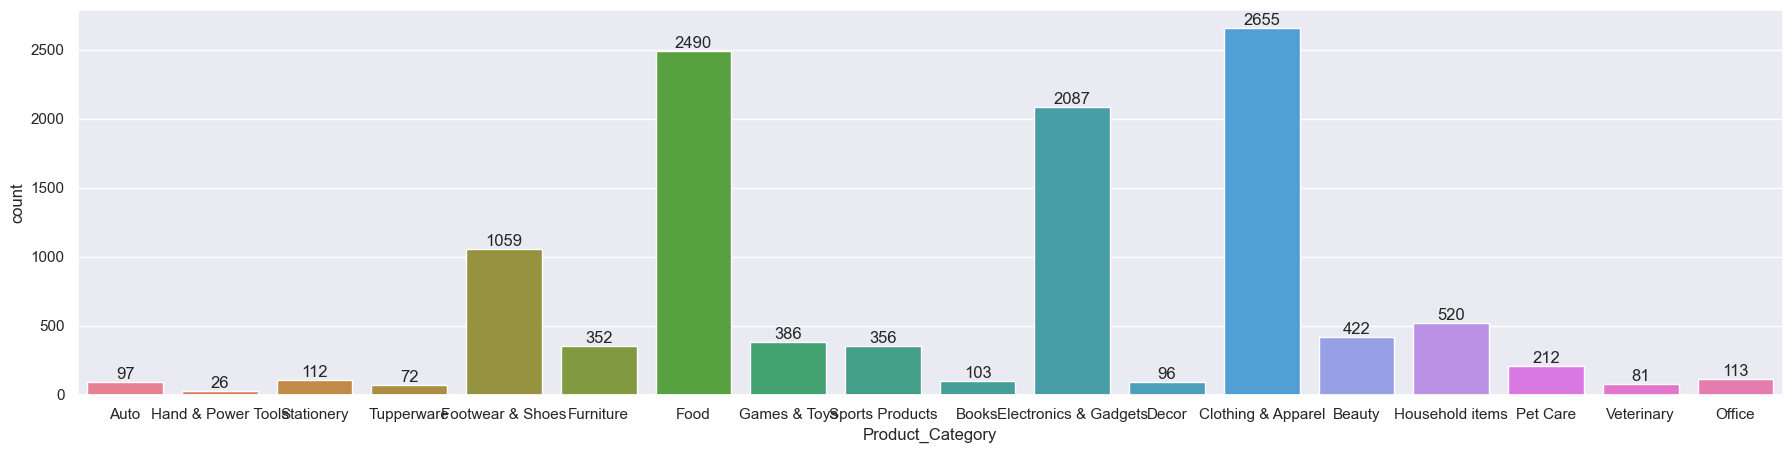

In [128]:
ax= sns.countplot(data=df,x="Product_Category",hue="Product_Category")
sns.set(rc={"figure.figsize":(22,5)})
for bars in ax.containers:
    ax.bar_label(bars)

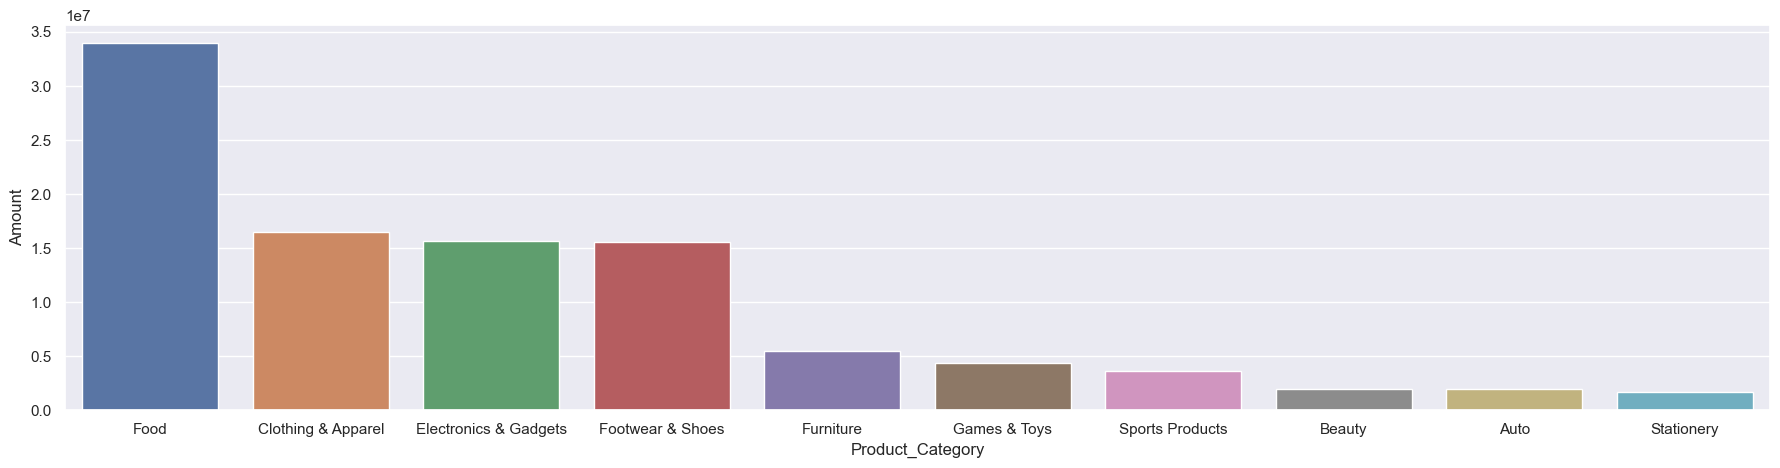

In [133]:
sales_product= df.groupby(["Product_Category"],as_index=False)["Amount"].sum().sort_values(by="Amount",ascending=False).head(10)
sns.set(rc={"figure.figsize":(22,5)})
sns.barplot(data=sales_product,x="Product_Category",y="Amount",hue="Product_Category");

*From above graphs we can see that most of the sales is from Food, clothing and Electronics*

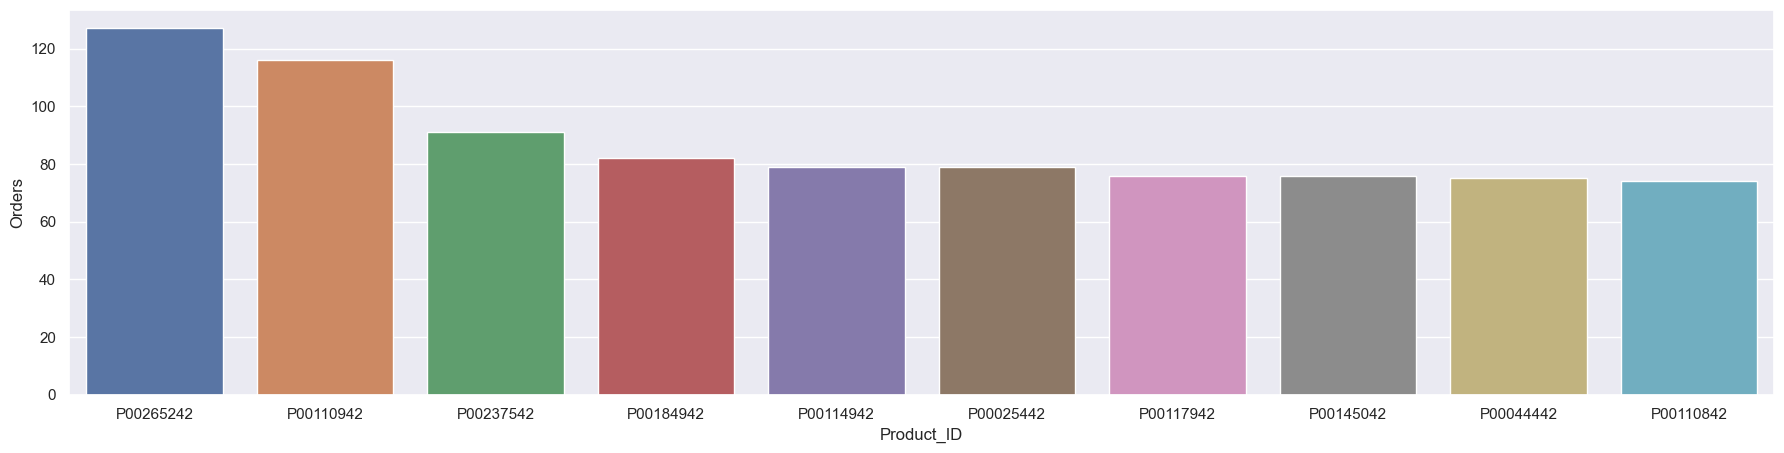

In [135]:
sales_product= df.groupby(["Product_ID"],as_index=False)["Orders"].sum().sort_values(by="Orders",ascending=False).head(10)
sns.set(rc={"figure.figsize":(22,5)})
sns.barplot(data=sales_product,x="Product_ID",y="Orders",hue="Product_ID");

## Conclusion

*Married women between age group 26-35 yrs from UP, Maharastra and Karnataka working in IT sector, Healthcare and Aviation are more likey buy products from Food, Clothing and Electronics category*